<a href="https://www.kaggle.com/code/rebeccapringle/playground-series-s3e7?scriptVersionId=120513664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import datasets 

In [2]:
dftrain = pd.read_csv('/kaggle/input/playground-series-s3e7/train.csv')
dftest = pd.read_csv('/kaggle/input/playground-series-s3e7/test.csv')

dftrainadd = pd.read_csv('/kaggle/input/reservation-cancellation-prediction/train__dataset.csv')
dftestadd = pd.read_csv('/kaggle/input/reservation-cancellation-prediction/test___dataset.csv')

In [3]:
# combine to make one training set
dftrain = pd.concat([dftrain,dftrainadd]).reset_index(drop=True)
dftrain.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1.0,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2.0,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3.0,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4.0,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


# Meaning of data from original dataset

Booking_ID: unique identifier of each booking

No of adults: Number of adults

No of children: Number of Children

noofweekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

noofweek_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

typeofmeal_plan: Type of meal plan booked by the customer

requiredcarparking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

roomtypereserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

Market segment type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

noofprevious_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

noofpreviousbookingsnot_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avgpriceper_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

noofspecial_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

# Data Visualisation

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'no_of_adults'),
 Text(2.5, 0, 'no_of_children'),
 Text(3.5, 0, 'no_of_weekend_nights'),
 Text(4.5, 0, 'no_of_week_nights'),
 Text(5.5, 0, 'type_of_meal_plan'),
 Text(6.5, 0, 'required_car_parking_space'),
 Text(7.5, 0, 'room_type_reserved'),
 Text(8.5, 0, 'lead_time'),
 Text(9.5, 0, 'arrival_year'),
 Text(10.5, 0, 'arrival_month'),
 Text(11.5, 0, 'arrival_date'),
 Text(12.5, 0, 'market_segment_type'),
 Text(13.5, 0, 'repeated_guest'),
 Text(14.5, 0, 'no_of_previous_cancellations'),
 Text(15.5, 0, 'no_of_previous_bookings_not_canceled'),
 Text(16.5, 0, 'avg_price_per_room'),
 Text(17.5, 0, 'no_of_special_requests'),
 Text(18.5, 0, 'booking_status')]

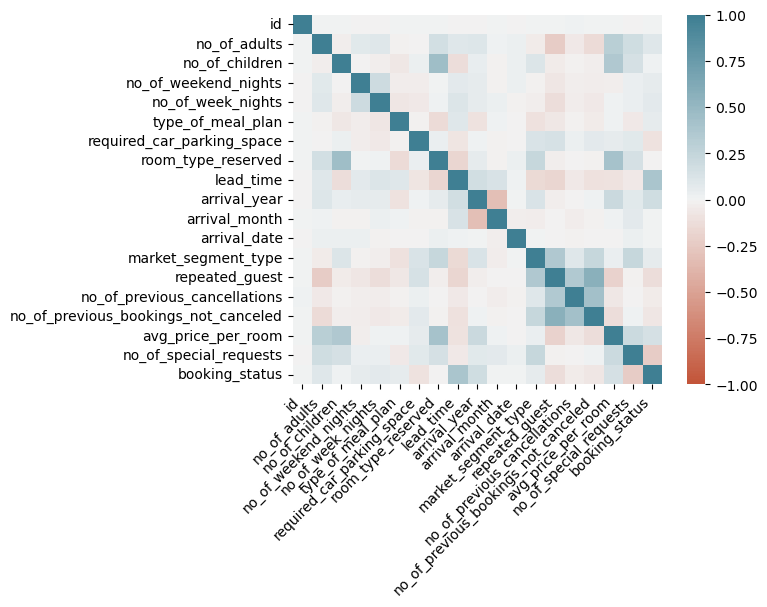

In [4]:
corr = dftrain.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'no_of_adults'),
 Text(1.5, 0, 'no_of_children'),
 Text(2.5, 0, 'no_of_weekend_nights'),
 Text(3.5, 0, 'no_of_week_nights'),
 Text(4.5, 0, 'type_of_meal_plan'),
 Text(5.5, 0, 'required_car_parking_space'),
 Text(6.5, 0, 'room_type_reserved'),
 Text(7.5, 0, 'lead_time'),
 Text(8.5, 0, 'arrival_year'),
 Text(9.5, 0, 'arrival_month'),
 Text(10.5, 0, 'arrival_date'),
 Text(11.5, 0, 'market_segment_type'),
 Text(12.5, 0, 'repeated_guest'),
 Text(13.5, 0, 'no_of_previous_cancellations'),
 Text(14.5, 0, 'no_of_previous_bookings_not_canceled'),
 Text(15.5, 0, 'avg_price_per_room'),
 Text(16.5, 0, 'no_of_special_requests'),
 Text(17.5, 0, 'booking_status')]

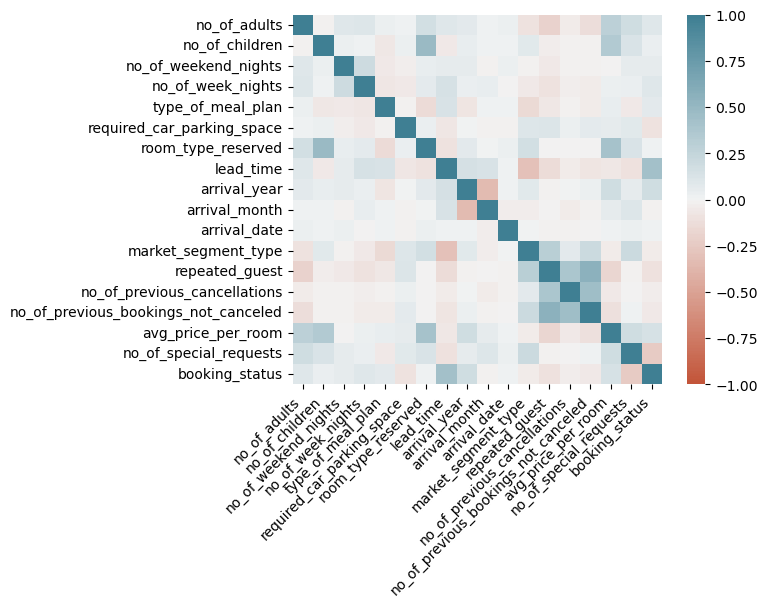

In [5]:
corr = dftrainadd.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [6]:
dftrain.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1.0,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2.0,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3.0,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4.0,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [7]:
features = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','required_car_parking_space','room_type_reserved','lead_time','arrival_year','arrival_month','arrival_date','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

In [8]:
# Drop the 'Id' columns
dftrain = dftrain.drop(columns=['id'])
dftest = dftest.drop(columns=['id'])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain = dftrain.drop(columns=['booking_status'])
X = scaler.fit_transform(Xtrain[features])
Xtrain = pd.DataFrame(X)

ytrain = dftrain['booking_status']
ytrain = pd.DataFrame(ytrain)

X = scaler.fit_transform(dftest[features])
Xtest = pd.DataFrame(X)


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(Xtrain, ytrain, test_size = 0.2,random_state = 42)

import xgboost as xgb

xgb_params = {
    'learning_rate': 0.01,
    'max_depth': 6,
    'min_child_weight': 7,
    'subsample': 0.9,
    'colsample_bytree': 0.5,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 10,
    'n_estimators': 5000,
    'reg_alpha': 0.1, 
    'reg_lambda': 0.1
}

XGB_MODEL = xgb.XGBClassifier(**xgb_params)
XGB_MODEL.fit(X_train, y_train, eval_set= [(X_test,y_test)], early_stopping_rounds = 400, verbose=400)
XGB_pred = XGB_MODEL.predict(X_test)
XGB_MODEL.score(X_test, y_test)

[0]	validation_0-auc:0.63794


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[400]	validation_0-auc:0.89514
[800]	validation_0-auc:0.90091
[1200]	validation_0-auc:0.90419
[1600]	validation_0-auc:0.90625
[2000]	validation_0-auc:0.90780
[2400]	validation_0-auc:0.90884
[2800]	validation_0-auc:0.90963
[3200]	validation_0-auc:0.91027
[3600]	validation_0-auc:0.91079
[4000]	validation_0-auc:0.91120
[4400]	validation_0-auc:0.91150
[4800]	validation_0-auc:0.91169
[4999]	validation_0-auc:0.91182


0.8437915006640107

In [11]:
preds = XGB_MODEL.predict(Xtest)
pred_proba = XGB_MODEL.predict_proba(Xtest)

In [12]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e7/sample_submission.csv')
sub['booking_status'] = pred_proba[:,1]
sub.to_csv('submission.csv', index=False)